In [60]:
training_points = [[20,8], [15,20], [16,10], [5,15], [16,6], [2,20]]
print("the training set content{} points".format(len(training_points)));
labels = [1,1,0,0,0,0];
for index_points in range(0,len(training_points)):
    print("the point {} has label {}".format(training_points[index_points],labels[index_points]));

the training set content6 points
the point [20, 8] has label 1
the point [15, 20] has label 1
the point [16, 10] has label 0
the point [5, 15] has label 0
the point [16, 6] has label 0
the point [2, 20] has label 0


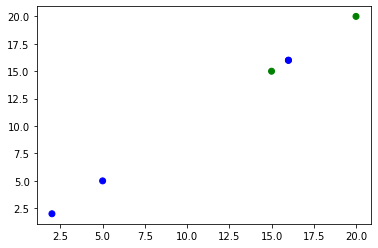

In [61]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.array(training_points)
#print(array)
#x=array[:,0]
#y=array[:,1]
colors = np.array([x for x in "bgrcmyk"])
plt.scatter(x[:,0],x[:,0], color=colors[list(labels)].tolist())
plt.show()

In [74]:
ymax=max(x[:,1])
ymin=min(x[:,1])


In [75]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=5000,tol=None, random_state=0)
clf

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
clf.fit(x, labels)
clf.score(x, labels)

1.0

In [77]:
labels

[1, 1, 0, 0, 0, 0]

In [78]:
y_pred = clf.predict(x)
y_pred

array([1, 1, 0, 0, 0, 0])

In [79]:
w0=clf.coef_[0][0]
w1=clf.coef_[0][1]
print("w0 = ", clf.coef_[0][0])
print("w1 = ", clf.coef_[0][1])

w0 =  24.0
w1 =  8.0


In [80]:
import matplotlib.lines as mlines

def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

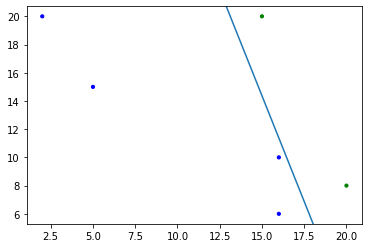

In [81]:
plt.scatter(x[:, 0], x[:, 1], color=colors[list(labels)].tolist(), s=10) 
p1 = [0,-(clf.intercept_[0]/clf.coef_[0][1])];
p2 = [-(clf.intercept_[0]/clf.coef_[0][0]),0];
#plt.plot(p1,p2)
newline(p1,p2)
plt.show();

In [82]:
print("Bias values :")
print(clf.intercept_[0])

Bias values :
-475.0


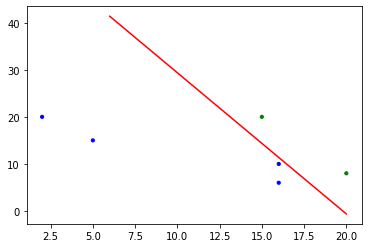

In [83]:
plt.scatter(x[:, 0], x[:, 1], color=colors[list(labels)].tolist(), s=10) 

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'r-')